# Week 19 Group Exercise

## 1) Take one of the supervised learning models you have built recently and apply at least three dimensionality reduction techniques to it (separately). Be sure to create a short summary of each technique you use. Indicate how each changed the model performance. Reference: https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

**Short description of why dimensionality reduction techniques are useful:**

Dataset containing high dimensional data can be difficult to handle. In particular, high dimensions are difficult to visualize and can be hard to draw conclusions from or identify patterns in. Using dimensionality reduction can help address those problems and can also help decrease storage needs, decrease computational time, may lead to enhanced algorithm perfomance, and can decrease or eliminate issues caused by multicolinearity within a dataset. The primary goal of any dimensionality reduction technique is to maintain the most important information in the dataet/its basic structure while refitting the data in a transformation to a lower dimension. There are techniques which both linearly and non-linearly transform the data. Here, I look at examples of each class. However, as I observed in this exercise, not every dataset needs or benefits from these techniques. It is again a case of knowing your data, experimenting and applying applicable techniques.

In [23]:
#importing the usual things
import numpy as np
import pandas as pd

#reading in the csv file for the dataset I want as a pandas dataframe
df = pd.read_csv(r'outlier_removed_abalone.csv')

#viewing the head of the dataframe
df.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,age_sex,age_sex_A,age_sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,A,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,A,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,A,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,A,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,I,0,1


#### I decided to use a simple linear regression as my model of interest for this problem. I chose a linear regression because it achieved results similar to more complex models.

### Method 1

#### Linear Method: Principal Components Analysis (PCA)
    
PCA is an extremely popular method of dimensionality reduction although it should typically only be used with dense data (very few missing data points). Since the dataset I chose has no missing values (all were removed prior to the dataset being posted to the UCI data repository), PCA may be a good fit. We also know from past analyses that there are multiple variables that have colinearity with one another. 

The primary goal of PCA is to capture as much data variance as possible in as few Principal Components as possible, thereby reducing the number of features used and decreasing model complexity. PCA typically involves standardizing the data (it is sensitive to large differences in variance), creating a covariance matrix and using the eigenvectors and eigenvalues to identify the linear combinations which then form the principal components. The new principal components are not correlated and typically, the very first few principal components will contain the vast majority of the sample variance.

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#defining features and target as X and y
X = df.drop(['age', 'rings', 'age_sex'], axis=1)

y = df['age']


#using standard scaler to scale the X variables
X = StandardScaler().fit_transform(X)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)




##### Multivariate Linear Model on the Dataset

In [41]:
#from sklearn import linear_model
#linear_reg = linear_model.LinearRegression()
#linear_reg.fit(X_train, y_train)



#how/can I use ols with a training and test set? I haven't been able to figure that out yet and would like 
#to use it over sklearn's linear_model since it was presented as being the "gold standard"



#print('r^2:', T_multi1.rsquared)
#print('r^2 adjusted:', T_multi1.rsquared_adj)

import statsmodels.api as sm

linear_model = sm.OLS(y_train, X_train)
results = linear_model.fit()
print(results.summary())

#Not sure why I'm getting results that seem so far off from the other Linear Regression model I used...

                                 OLS Regression Results                                
Dep. Variable:                    age   R-squared (uncentered):                   0.029
Model:                            OLS   Adj. R-squared (uncentered):              0.027
Method:                 Least Squares   F-statistic:                              11.73
Date:                Fri, 09 Jul 2021   Prob (F-statistic):                    1.40e-16
Time:                        01:05:40   Log-Likelihood:                         -12049.
No. Observations:                3135   AIC:                                  2.411e+04
Df Residuals:                    3127   BIC:                                  2.416e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)
print('RMSE: ', np.sqrt(MSE))

MSE:  3.634673828159976
RMSE:  1.9064820555567723


#### PCA and determining the number of PCs 

Text(0, 0.5, 'Cumulative variance explained for PCA of abalone dataset')

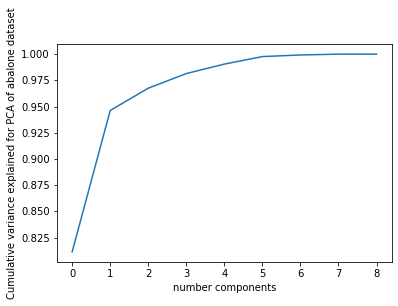

In [33]:
#Trying to figure out an optimal number of principal components to use for my analysis

#fitting the PCA to my training dataset (I also tried on the whole dataset and achieved the same answers,
#as I believe should be expected)
pca = PCA().fit(X_train)

#Plotting the explained variance for 8 PCs
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number components')
plt.ylabel('Cumulative variance explained for PCA of abalone dataset')

##### As can be seen by the plot above, we get up to 95% variance explained using only 1 PC. By the time we get to 3 PC, over 97.5% of the variance can be explained. I decided to use 3 PC for my model input moving forward.

In [57]:
pca_final = PCA(n_components = 3)
 
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)
 
explained_variance = pca_final.explained_variance_ratio_
print(explained_variance)

[0.81136214 0.13489789 0.02124357]


#### Applying the model to my new X data that contains the PCs

In [58]:
lin_reg_pca = LinearRegression()

lin_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = lin_reg_pca.predict(X_test_pca)

from sklearn import metrics
MSE_pca = metrics.mean_squared_error(y_test, y_pred_pca)
print('MSE: ', MSE_pca)
print('RMSE: ', np.sqrt(MSE_pca))

MSE:  3.974599153786927
RMSE:  1.9936396750132475


##### Applying PCA to my data actually resulted in a decrease in my model performance.

### Method 2
##### Linear Method: Singular Value Decomposition (SVD)

SVD is a linear dimensionality reduction technique. It relies heavily on linear algebra. Like PCA, SVD is performed with a goal of reducing the number of features while preserving the most important components of a dataset (in other words, preserving maximum variance). SVD is based on the concept that a single matrix can be made which holds the same basic data structure/information as several other matrices. By using a few key characteristics of the single matrix, we can approximate the original data using fewer dimensions.  Unlike PCA, SVD is a popular technique when there are many missing values (sparse data). For dense data, PCA may often be preferred for a dataset like mine where there are few missing values. 

In [77]:

from sklearn.decomposition import TruncatedSVD

#Fitting the SVD class
svd =  TruncatedSVD(n_components = 2)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

#Instantiating the model
lin_reg_svd = LinearRegression()

#Fitting the model on the X_train data that has had SVD applied and my original train data
lin_reg_svd.fit(X_train_svd, y_train)

#Using the SVD data to predict y values
y_pred_svd = lin_reg_svd.predict(X_test_svd)


#Calculating performance metrics for my model
MSE_svd = metrics.mean_squared_error(y_test, y_pred_svd)
print('MSE: ', MSE_svd)
print('RMSE: ', np.sqrt(MSE_svd))

MSE:  4.598023477177701
RMSE:  2.144300230186459


##### As anticipated, the PCA dimensionality reduction outperformed SVD.

### Method 3 & 4
##### Multidimensional Scaling: Local Linear Embedding & Isomap Embedding

While PCA is often a useful technique, it is limited by the requirement that a linear model is used and is therefore not useful for all datasets. PCA is especially sensitive to some qualities of a dataset such as a highly skewed distribution, extreme outliers, and even one-hot encoded data that has a large number of classes/variables encoded. This is where multidimensional scaling techniques can come in.

A manifold is a smooth, lower dimensional object that can be exist/be projected onto a higher dimensional plane. For example, we could consider a piece of paper (2D) rolled into a spiral. The paper retains its 2D qualities (for example, length and width) even when it is existing as a 3D shape/embedded in a 3D field. If we can find a manifold that fits our data, we can use that as a way to decrease the number of dimensions (features) we need to describe the data. The relationship of the manifold to higher dimensional space is often, but not always (see MDS) non-linear. The 2 techniques I'm discussing here both rely on nearest neighbor techniques and the first step in each involves looking for and identifying nearest neighbors

In local linear embedding, the data is divided up into "neighborhoods". Each local neighborhood essentially has a PCA applied to it. These PCAs are then compared to find the series of PCAs that best fits the data, thus preserving much of the original data structure. 

Isomap embedding is a multimensional scaling technique. It is a nearest neighbor technique and estimates each the features of a manifold based upon each data point's neighbors on that manifold. In isomap embeddingm the main goal of the algorithm is to preserve the geodesic(shortest line between 2 points on any curved surface) distances that exist in the original/untransformed dataset. Of note, this technique may be best used when combined with several runs of the algorithm-by nature, each time it is run, results vary to some degree. So, it is best to average several attempts to get an idea of the mean performance. I did not do this here due to time constraints before the exercise deadline, but a simple for loop should get the job done.

In [80]:
from sklearn.manifold import LocallyLinearEmbedding
embed = LocallyLinearEmbedding(n_components=2) 
X_train_IE = embed.fit_transform(X_train)
X_test_IE = embed.fit_transform(X_test)

lin_reg_IE = LinearRegression()

lin_reg_IE.fit(X_train_IE, y_train)
y_pred_IE = lin_reg_IE.predict(X_test_IE)

from sklearn import metrics
MSE_IE = metrics.mean_squared_error(y_test, y_pred_IE)
print('MSE: ', MSE_IE)
print('RMSE: ', np.sqrt(MSE_IE))

MSE:  24.460173931879606
RMSE:  4.94572279165337


In [73]:
from sklearn.manifold import Isomap
iso_model = Isomap(n_components=3)
X_train_iso = iso_model.fit_transform(X_train)
X_test_iso = iso_model.fit_transform(X_test)

lin_reg_iso = LinearRegression()

lin_reg_iso.fit(X_train_iso, y_train)
y_pred_iso = lin_reg_iso.predict(X_test_iso)

from sklearn import metrics
MSE_iso = metrics.mean_squared_error(y_test, y_pred_iso)
print('MSE: ', MSE_iso)
print('RMSE: ', np.sqrt(MSE_iso))

MSE:  5.54123970899882
RMSE:  2.35398379539852


##### Both of these techniques yielded poor model performance and both were considerably worse than using the original untransformed data.

### Bonus technique: Multidimensional scaling (MDS)

MDS relies on considering how similar or dissimilar datapoints are. It does this through evaluation of distance between data points.

In [63]:
#MDS
from sklearn.manifold import MDS
mds = MDS(n_components=3, random_state=42)
X_train_mds = mds.fit_transform(X_train)

KeyboardInterrupt: 

MDS is considerably more computationally expensive than the other methods. In fact, it crashed my kernel and made my computer extremely unhappy so I did not try to compute it again.

### Summary

| Data Transformation Technique | RMSE for Linear Model |
|-------------------------------|-----------------------|
| no transformation | 1.9065 |
| PCA | 1.9936 |
| SVD | 2.1443 |
| LLE | 5.1447 |
| Isomap | 2.3540 |
| MDS | crashed |

The best result involved no data transformation for this dataset. PCA transformation resulted in marginally lower performance but all other techniques results in significant losses in model performance using the transformed data. This suggests to me that the dataset I chose (abalone) can be described by simple, linear techniques. Some features may be combined or decreased (for instance, I know the weight features are all highly correlated) but in this case, the model performance is not increased by doing so. In higher dimension, more complex, or non-linearly related data, these approaches are likely to be more helpful.

## 2) Write a function that will indicate if an inputted IPv4 address is accurate or not. IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated by periods.

Input 1: 2.33.245.5 Output 1: True 

Input 2: 12.345.67.89 Output 2: False

In [20]:
#Defining my function
def address_check(IP_input):
    #Checking to make sure there are 4 values. If not, we can immediately return False
    if str(IP_input).count('.') != 3:
        return False
    else:
        #Splitting the IPv4 address into a list of components
        split_list = IP_input.split(".")
        #print(split_list)
        for i in split_list:
            i_int = int(i)
            #print(i_int)
            #Setting conditions given in the original question; if conditions are not met, return False
            if 0 > i_int or i_int > 256:
                return False
        #If the IPv4 address passes everything else, we can confidently return True and say it is valid
        return True

#Test Cases:

#address_check('2.33.245')
#address_check('2.33.265.2')
#address_check('2.33.245.5')
address_check('12.345.67.89')

False